# Libraries and functions¶

In [9]:
##############################################################################################################################################
##############################                                                                                   #############################
##############################                                        European Climate Assessment  &             #############################
##############################                                                 Eurostat                          #############################
##############################                                             Updated 14/11/22                      #############################
##############################################################################################################################################

###  librairies declaration
import warnings
import time
import pandas                             as pd
#import duckdb                             as db
import missingno                          as missin

import numpy                              as np
lasource_de_donnees="Sources : European Climate Assessment & Dataset (ECAD) & Eurostat urb-cpop - Updated 14/11/22"
import plotly.express                     as px
import plotly.graph_objects               as go

from math import *
import scipy.stats                        as st

# Analyse de la normalité grâce au test de shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Missing value
import missingno                          as msno # msno.bar(le_df) ou matrix(le_df) ou heatmap(le_df)

from scipy.stats                          import chi2_contingency
from sklearn.cluster                      import KMeans
import seaborn                            as sns; sns.set()

import matplotlib.pyplot                  as plt
#import seaborn            as sns

import statsmodels.api                    as sm
import statsmodels.formula.api            as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn                              import preprocessing,cluster,decomposition,metrics  # normalisation

# Function biplot :
import matplotlib                         as mpl
import matplotlib.cm                      as cm
from scipy.spatial                        import ConvexHull

# Normaliser les donnees :
from sklearn.preprocessing                import StandardScaler

warnings.filterwarnings('ignore')

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 23)
# Configure display options
pd.set_option("display.max_columns", None)

def calculer_plage_max(var_x,var_y,df):
    '''
    Allows you to establish the maximum range without interruption or there is a lot of data (temperatures, number of cities, etc.)
    '''
    x=df[var_x];y=df[var_y]-df[var_y].quantile(0.50)
    # Identifier les points où la courbe traverse l'axe des abscisses
    points_intersection = np.where(y >= 0)[0]
    # Initialise debut /fin de segement
    debut_segment = 0; fin_segment = 0;sav_plage_max=0; sav_debut_segment=0;sav_fin_segement=0; plage_max=0;iteration=0

    # il faut trouver le plus long segement
    for i in range(len(points_intersection) - 1):
        #print("1ere i ",i)
        if debut_segment ==0 & iteration== 0:
            debut_segment = points_intersection[i]
            iteration=points_intersection[i]+1            
        else:
            if iteration==points_intersection[i]:
                plage_max = points_intersection[i]-debut_segment
                fin_segment=points_intersection[i]
                iteration=points_intersection[i]+1 
            else:
                # save plage max 
                if plage_max>sav_plage_max:
                    sav_plage_max=plage_max
                    sav_debut_segment=debut_segment
                    sav_fin_segment=fin_segment
                iteration=points_intersection[i]+1  
                debut_segment=points_intersection[i]
                plage_max=0
                
    return var_y,df.iloc[sav_debut_segment,0],df.iloc[sav_fin_segment,0]


strdirectory="../Analyse Temperature Europe/"

## Open Files de fichier

In [10]:
# Fichier à ouvrir
fichier=pd.read_csv(strdirectory+'Selection_etape_2_data_temps_hab.csv')

fichier['DATE_str_YEAR']=fichier['DATE_str_YEAR'].astype(str)
fichier['DATE_str_MONTH']=fichier['DATE_str_MONTH'].astype(str)
fichier['DATE_str_DAY']=fichier['DATE_str_DAY'].astype(str)

# Univariate analysis

## Quantitative variable

HGHT_num n° 1
nb outlier


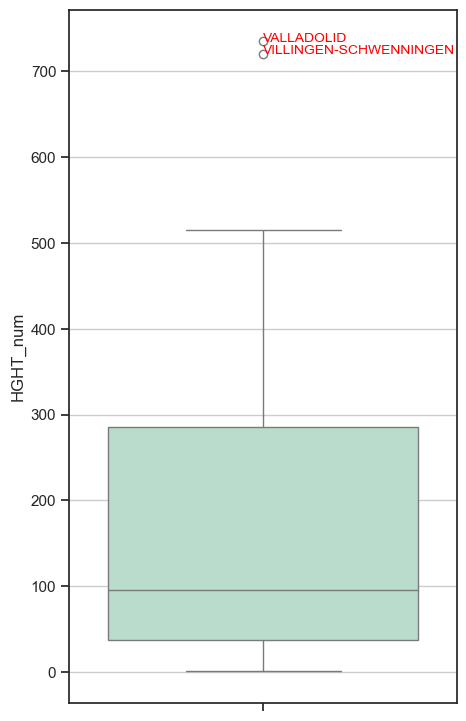

NB_HAB n° 2
nb outlier


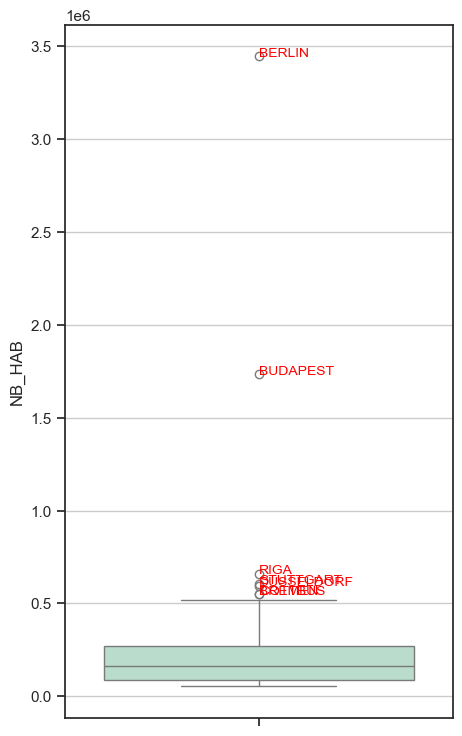

TEMPERATURE n° 3
nb outlier


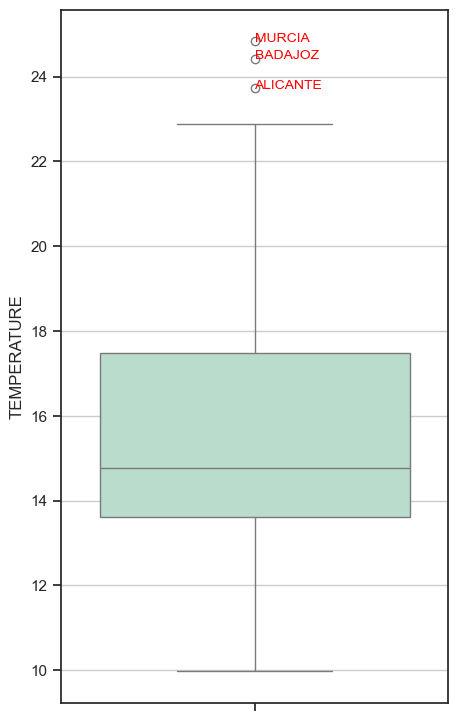

In [11]:
# Univariate descriptive analysis of quantitative variables
fichier_analyser=fichier.groupby(['CITY','CN','CN_NAME','CAPITALE'],as_index=False).agg({'LAT_degre':'mean',	'LON_degre':'mean',	'HGHT_num':'mean',	'NB_HAB':'mean',	'TEMPERATURE':'mean'})

# Selection of quantitative variables
quant_vars = fichier_analyser[['CITY','HGHT_num','NB_HAB','TEMPERATURE']] #.select_dtypes(include=['float64', 'int64'])  .query("CN!='DE' & CN!='ES' & CN!='PL' & CN!='RO'")

axe_abscisse=5
axe_ordonnee=9
# Plotting boxplots for each quantitative variable with Seaborn
sns.set(style="ticks")
enumere=0
for var in quant_vars:
    if var!='LAT_degre' and var!='LON_degre' and var!='CITY':
        enumere=enumere+1
        print(var,"n°",enumere)
        # mediane ?
        la_mediane=quant_vars[var].median()
        plt.figure(figsize=(axe_abscisse,axe_ordonnee))
        plt.grid()
        box=sns.boxplot(y=var, data=quant_vars, palette="Pastel2" )
        #box=sns.stripplot( y=var,data=quant_vars)
        # Identify the upper and lower bound outliers:
        delta= 1.5*(quant_vars[var].quantile(0.75) - quant_vars[var].quantile(0.25))
        outliers = quant_vars[(quant_vars[var] > (quant_vars[var].quantile(0.75) + delta)) | (quant_vars[var] < (quant_vars[var].quantile(0.25) - delta))]
        # Ajoutez les annotations
        for i, outlier in outliers.iterrows():
          box.annotate(str(outlier["CITY"]), xy=(0, outlier[var]), color="red", fontsize=10)

        quant_vars['col_zscore'] = (quant_vars[var] - quant_vars[var].mean())/quant_vars[var].std(ddof=0)
        print("nb outlier",)

        plt.show()

## Qualitative variable

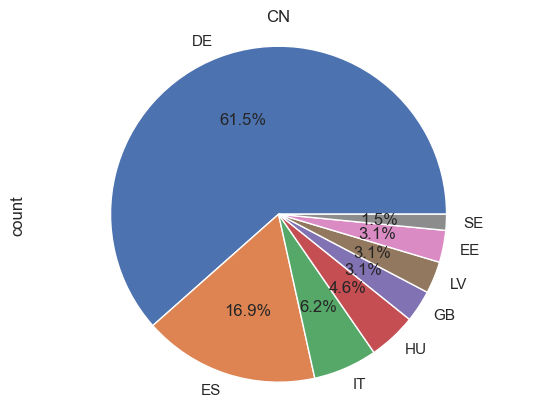

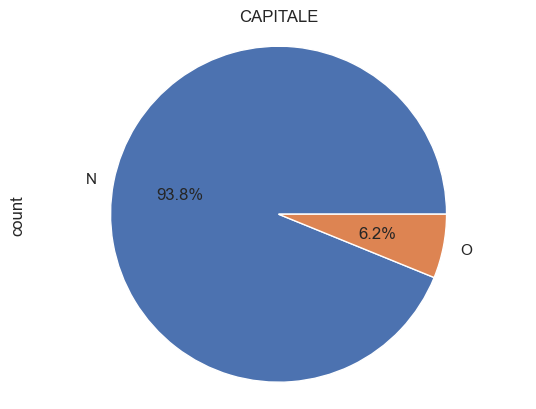

In [12]:
# Select categorical variables
cat_vars = ['CN','CAPITALE']
#fichier_analyser_sans_pays_PL = fichier_analyser.query("CN!='DE' & CN!='ES' & CN!='PL' & CN!='RO'")

# Generate a pie plot for each categorical variable
for var in cat_vars:
    fichier_analyser[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

# Distribution of variables

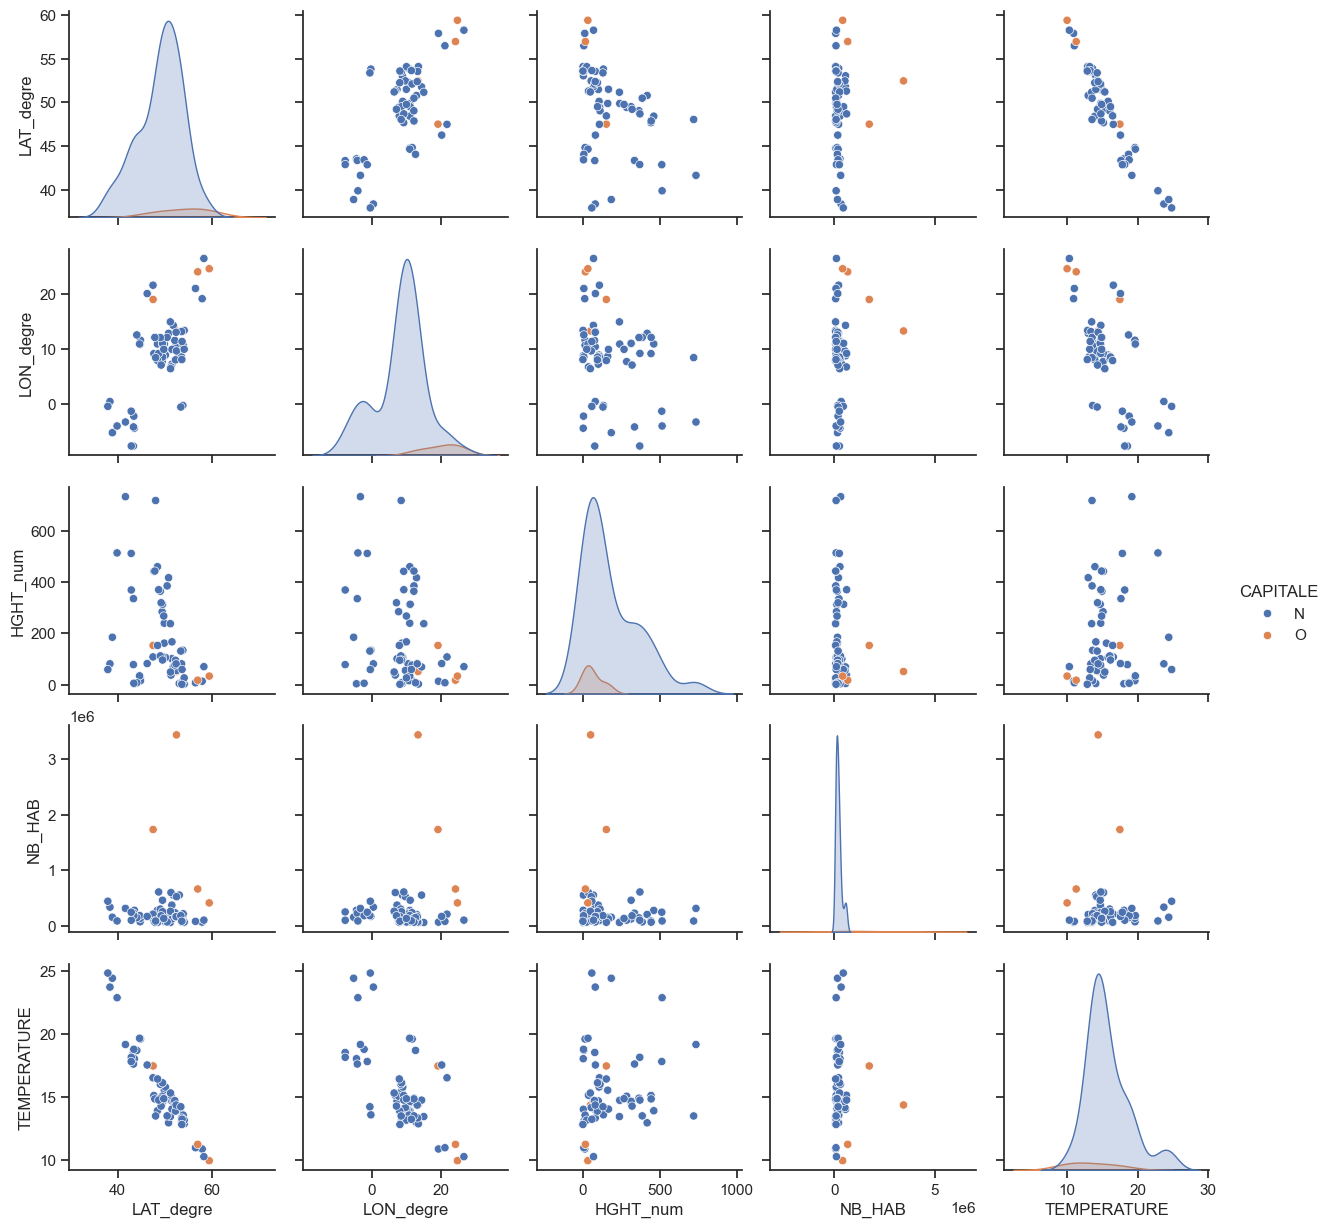

In [13]:
sns.pairplot(fichier.groupby(['CITY',
      'CN','CN_NAME','CAPITALE'],as_index=False).agg({'LAT_degre':'mean',	'LON_degre':'mean',	'HGHT_num':'mean',	'NB_HAB':'mean',	'TEMPERATURE':'mean'}),hue='CAPITALE')

Visual Analysis:

- There appears to be a linear relationship between latitude and temperature

- It seems that there is no linear relationship between longitudes and temperatures

- Capitals are better distributed across latitudes than longitudes

# Creating classes

In [65]:
order_dict={}
'''
fichier['classe_HAB_']=pd.qcut(fichier['NB_HAB'],4, precision=2)
fichier['classe_LAT_degre_']=pd.qcut(fichier['LAT_degre'],4, precision=2)
fichier['classe_LON_degre_']=pd.qcut(fichier['LON_degre'],4, precision=2)
fichier['classe_HGHT_num_']=pd.qcut(fichier['HGHT_num'],4, precision=2)
df_extract_all_day=fichier 
'''
#df_extract_per_year['classe_HGHT_num'].value_counts().sort_index()

df_extract_per_year=fichier.groupby(['CITY','CN','CN_NAME','CAPITALE','LAT_degre','LON_degre',
                                        'HGHT_num'],as_index=False).agg({'TEMPERATURE':'mean','NB_HAB':'mean'})
p=0 # not to much decimal

df_extract_per_year['classe_HAB']=pd.qcut(df_extract_per_year['NB_HAB'],4, precision=0)
# Renommez les catégories selon vos préférences
category_names = {
    df_extract_per_year['classe_HAB'].unique()[0]: '[55 300,90 000[',
    df_extract_per_year['classe_HAB'].unique()[1]: '[90 000,165 000[',
    df_extract_per_year['classe_HAB'].unique()[2]: '[165 000,280 000[',
    df_extract_per_year['classe_HAB'].unique()[3]: '[280 000,3 580 000['
}
df_extract_per_year['classe_HAB'] = df_extract_per_year['classe_HAB'].map(category_names)
# Spécifiez l'ordre des catégories dans une liste
order_HAB = ['[55 300,90 000[', '[90 000,165 000[', '[165 000,280 000[','[280 000,3 580 000[']
#order_liste.append(order_HAB)
order_dict['classe_HAB'] = order_HAB

df_extract_per_year['classe_LAT_degre']=pd.qcut(df_extract_per_year['LAT_degre'],4, precision=p)
# Renommez les catégories selon vos préférences
category_names = {
    df_extract_per_year['classe_LAT_degre'].unique()[0]: '[37, 47[',
    df_extract_per_year['classe_LAT_degre'].unique()[1]: '[47, 50[',
    df_extract_per_year['classe_LAT_degre'].unique()[2]: '[50, 52[',
    df_extract_per_year['classe_LAT_degre'].unique()[3]: '[52, 59['
}
df_extract_per_year['classe_LAT_degre'] = df_extract_per_year['classe_LAT_degre'].map(category_names)
# Spécifiez l'ordre des catégories dans une liste
order_LAT = ['[37, 47[', '[47, 50[', '[50, 52[','[52, 59[']
#order_liste.append(order_LAT)
order_dict['classe_LAT_degre'] = order_LAT

df_extract_per_year['classe_LON_degre']=pd.qcut(df_extract_per_year['LON_degre'],4, precision=p)
# Renommez les catégories selon vos préférences
category_names = {
    df_extract_per_year['classe_LON_degre'].unique()[0]: '[-9,7] ',
    df_extract_per_year['classe_LON_degre'].unique()[1]: ']7,10]',
    df_extract_per_year['classe_LON_degre'].unique()[2]: ']10,12]',
    df_extract_per_year['classe_LON_degre'].unique()[3]: ']12,26]'
}
df_extract_per_year['classe_LON_degre'] = df_extract_per_year['classe_LON_degre'].map(category_names)
# Spécifiez l'ordre des catégories dans une liste
order_LON = ['[-9,7]', ']7,10]', ']10,12]',']12,26]']
#order_liste.append(order_LON)
order_dict['classe_LON_degre'] = order_LON



df_extract_per_year['classe_TEMPERATURE']=pd.qcut(df_extract_per_year['TEMPERATURE'],4, precision=p)
# Renommez les catégories selon vos préférences
category_names = {
    df_extract_per_year['classe_TEMPERATURE'].unique()[0]: ']9,14]',
    df_extract_per_year['classe_TEMPERATURE'].unique()[1]: ']14,15]',
    df_extract_per_year['classe_TEMPERATURE'].unique()[2]: ']15,17]',
    df_extract_per_year['classe_TEMPERATURE'].unique()[3]: ']17,25]'
}
df_extract_per_year['classe_TEMPERATURE'] = df_extract_per_year['classe_TEMPERATURE'].map(category_names)
# Spécifiez l'ordre des catégories dans une liste
order_TEM = [']9,14]', ']14,15]', ']15,17]',']17,25]']
#order_liste.append(order_TEM)
order_dict['classe_TEMPERATURE'] = order_TEM


df_extract_per_year['classe_HGHT_num']=pd.qcut(df_extract_per_year['HGHT_num'],4, precision=p,)
# Renommez les catégories selon vos préférences
category_names = {
    df_extract_per_year['classe_HGHT_num'].unique()[0]: '[0,40[',
    df_extract_per_year['classe_HGHT_num'].unique()[1]: '[40,100[',
    df_extract_per_year['classe_HGHT_num'].unique()[2]: '[100,290[',
    df_extract_per_year['classe_HGHT_num'].unique()[3]: '[290,750['
}
df_extract_per_year['classe_HGHT_num'] = df_extract_per_year['classe_HGHT_num'].map(category_names)
# Spécifiez l'ordre des catégories dans une liste
order_HGH = ['[0,40[', '[40,100[', '[100,290[','[290,750[']
#order_liste.append(order_HGH)
order_dict['classe_HGHT_num'] = order_HGH


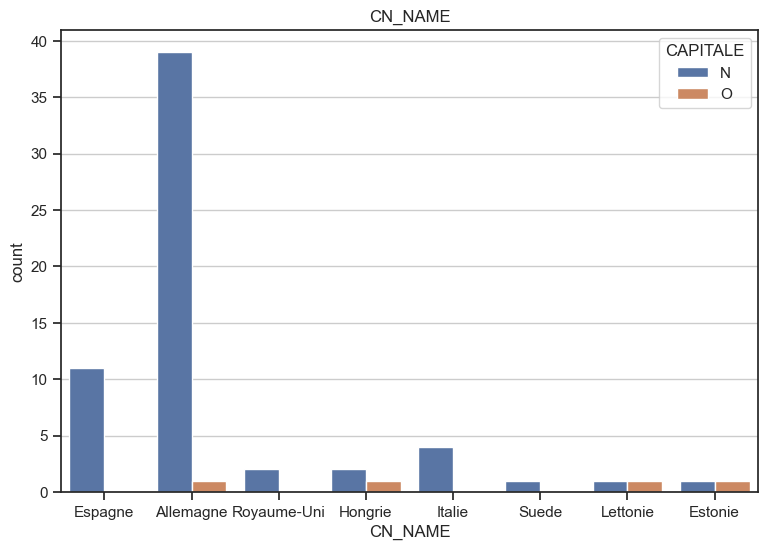

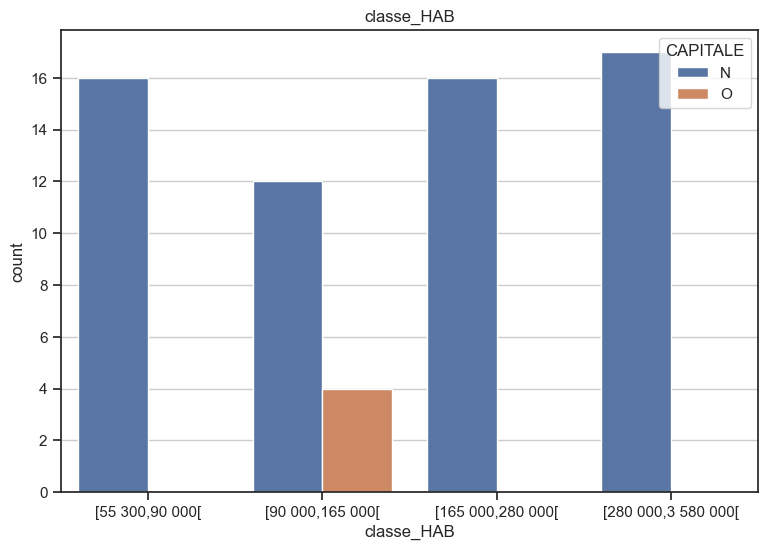

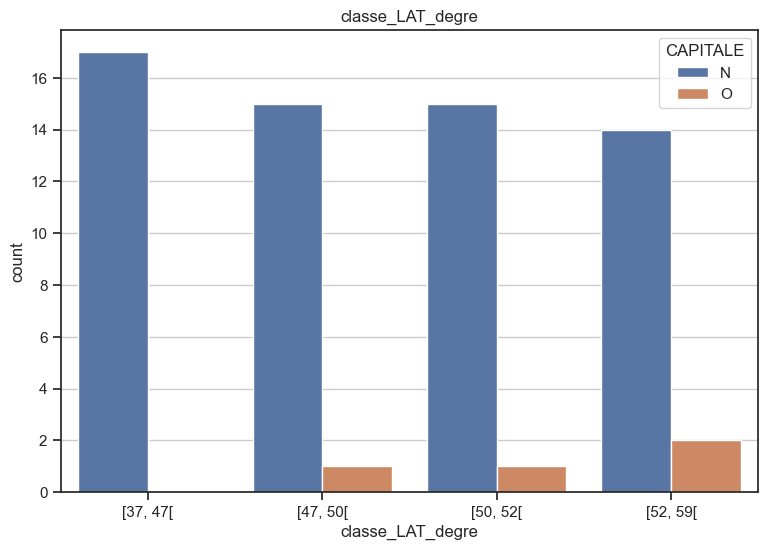

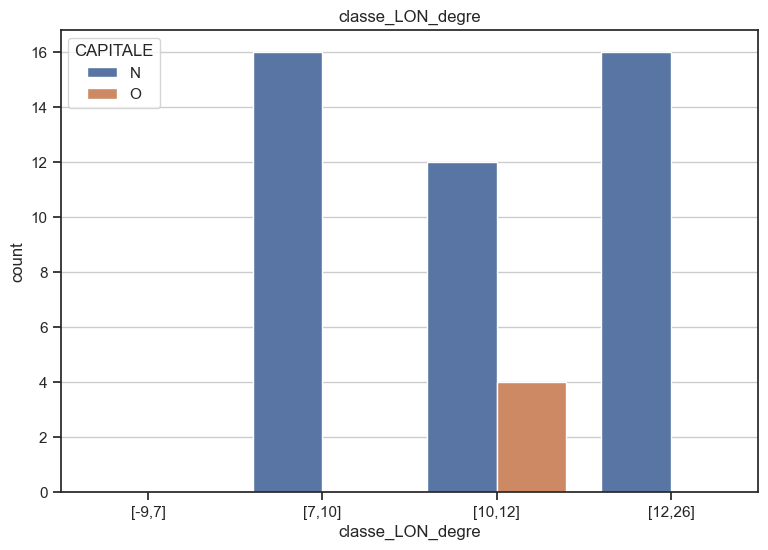

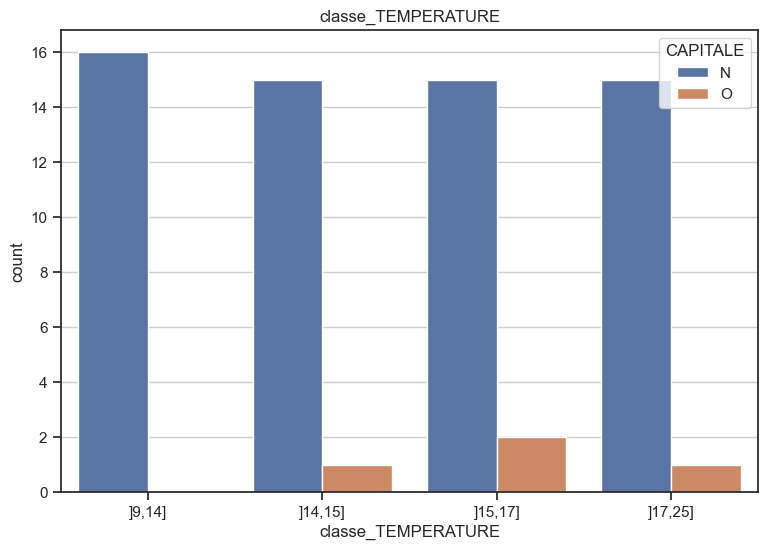

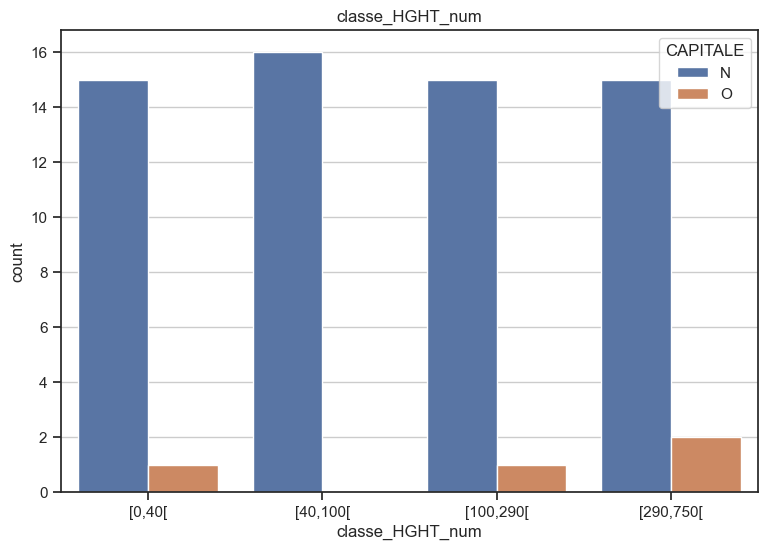


Capital cities are present in mid to high latitudes.
The capitals are present in a single class of longitudes.
The capitals of Italy, Spain, the United Kingdom and Sweden are not present in the analysis.


In [40]:

# Select categorical variables
cat_vars = ['CN_NAME','classe_HAB','classe_LAT_degre','classe_LON_degre','classe_TEMPERATURE','classe_HGHT_num']
#fichier_analyser_sans_pays_PL = fichier_analyser.query("CN!='DE' & CN!='ES' & CN!='PL' & CN!='RO'") ,'CAPITALE'
axe_abscisse=9;axe_ordonnee=6

# Generate a pie plot for each categorical variable
for var in cat_vars:
    #fichier_analyser[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    plt.grid()
    if var!='CN_NAME':
        sns.countplot(data=df_extract_per_year, x=var,order = order_dict[var], hue='CAPITALE') #
    else:
        sns.countplot(data=df_extract_per_year, x=var, hue='CAPITALE')
    plt.title(var)
    #plt.axis('equal')
    plt.show()
print("")
print("Capital cities are present in mid to high latitudes.")
print("The capitals are present in a single class of longitudes.")
print("The capitals of Italy, Spain, the United Kingdom and Sweden are not present in the analysis.")

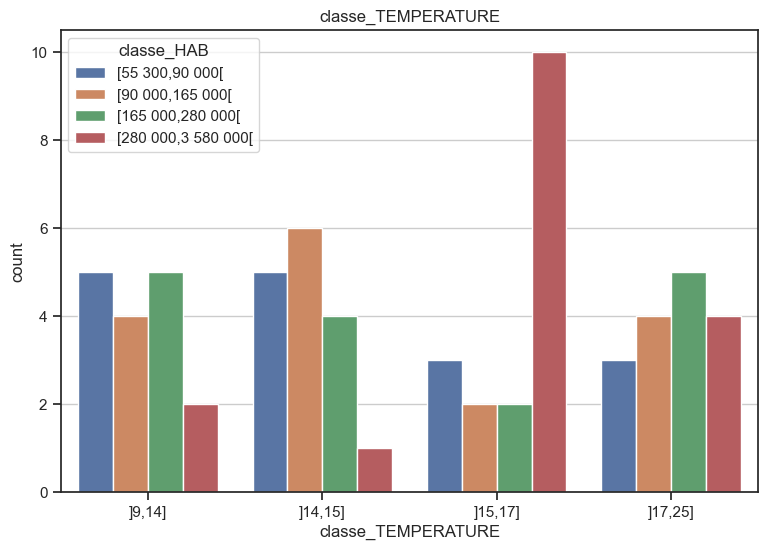

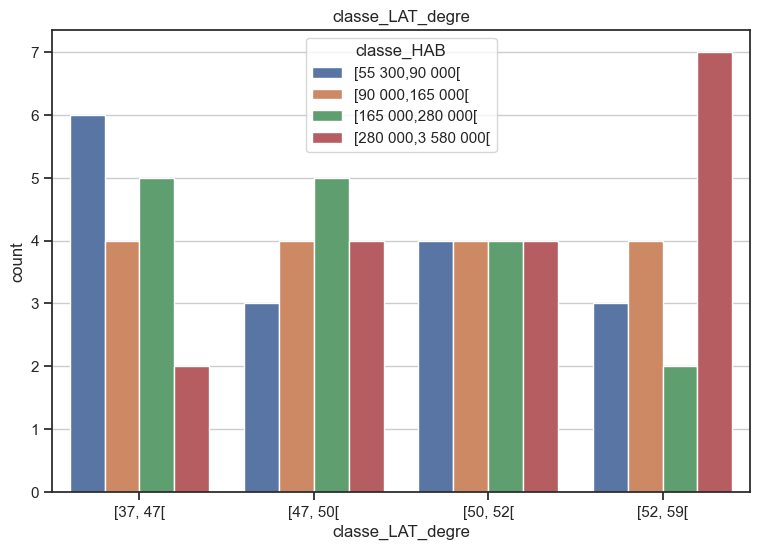

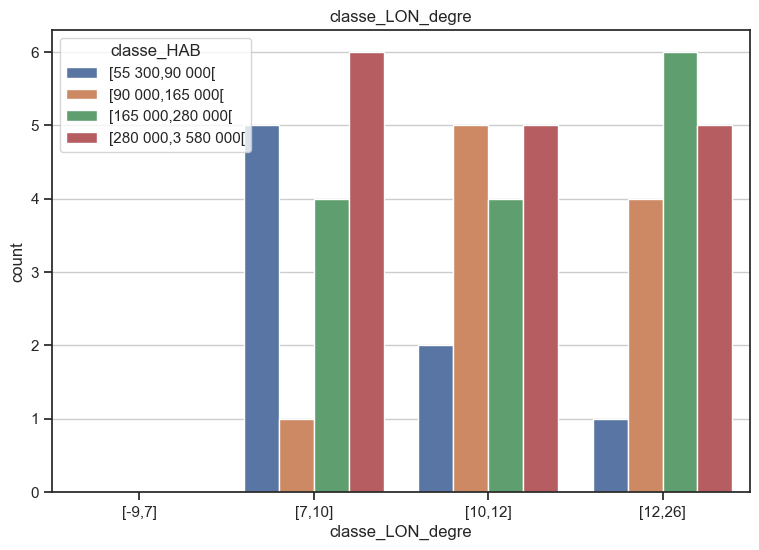

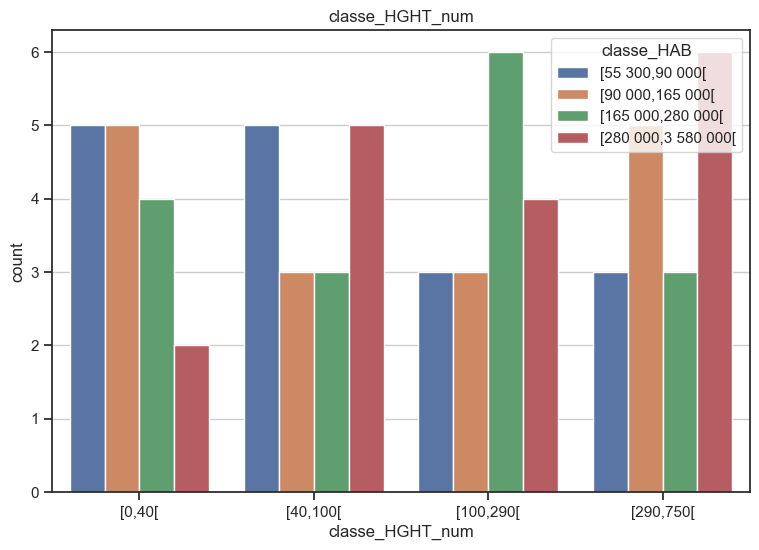


There is a link between sparsely populated cities and rising temperatures ?
There is a link between cities with medium/high population density and rising temperatures ?



In [41]:
# Select categorical variables
cat_vars = ['classe_TEMPERATURE','classe_LAT_degre','classe_LON_degre','classe_HGHT_num']
#fichier_analyser_sans_pays_PL = fichier_analyser.query("CN!='DE' & CN!='ES' & CN!='PL' & CN!='RO'") ,'CAPITALE'
axe_abscisse=9;axe_ordonnee=6

# Generate a pie plot for each categorical variable
for var in cat_vars:
    #
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    plt.grid()
    sns.countplot(data=df_extract_per_year, x=var, order = order_dict[var],hue='classe_HAB', hue_order=order_dict['classe_HAB']) #
    
    plt.title(var)
    #plt.axis('equal')
    plt.show()
    
print("")
print("There is a link between sparsely populated cities and rising temperatures ?")
print("There is a link between cities with medium/high population density and rising temperatures ?")
print("")

# Qualitative vs Qualitative

# Chi2 Test

Test du chi-carré (chi2)

Hypothèses

H0 : There is no association between the two qualitative variables.

H1 : There is an association between the two qualitative variables.

## Association classe temperature vs classe habitant

In [42]:
#from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df_extract_per_year['classe_TEMPERATURE'], df_extract_per_year['classe_HAB'])
print('No cell <5 ; the variables are categorical')
print("")
print("Contingency Table :")
contingency_table

No cell <5 ; the variables are categorical

Contingency Table :


classe_HAB,"[280 000,3 580 000[","[165 000,280 000[","[55 300,90 000[","[90 000,165 000["
classe_TEMPERATURE,,,,
"]15,17]",10,2,3,2
"]14,15]",1,4,5,6
"]17,25]",4,5,3,4
"]9,14]",2,5,5,4


In [43]:
# Perform the chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Show the results
print("Chi-square statistic :", chi2_stat)
print("P-valeur :", p_value)
print("Degrees of freedom :", dof)
print("Expected frequencies \n", expected_freq)

Chi-square statistic : 15.576138083910035
P-valeur : 0.07627811110625764
Degrees of freedom : 9
Expected frequencies 
 [[4.44615385 4.18461538 4.18461538 4.18461538]
 [4.18461538 3.93846154 3.93846154 3.93846154]
 [4.18461538 3.93846154 3.93846154 3.93846154]
 [4.18461538 3.93846154 3.93846154 3.93846154]]


### Coefficient Cramér-V

Strength of the association between two qualitative variables. It varies between 0 (no association) and 1 (perfect association).

In [44]:
# Calculate the Cramér-V coefficient
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Display the Cramér-V coefficient
print("Cramér-V coefficient :", cramer_v)
print("Lien faible")

Cramér-V coefficient : 0.28262631016863704
Lien faible


### Coefficient T de Tschuprow

H0 : There is no relationship between the two qualitative variables.

H1 : There is a relationship between the two qualitative variables.

In [45]:
# Calculate Tschuprow's T coefficient
n = df_extract_per_year.shape[0]
min_dim = min(contingency_table.shape) - 1
# Perform the chi-square test
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)
print('There is a relationship between 2 variables')

Coefficient T de Tschuprow : 0.28262631016863704
P-valeur : 0.07627811110625764
There is a relationship between 2 variables


## Association classe HGT_num vs classe habitant

In [46]:
# Create a contingency table
contingency_table = pd.crosstab(df_extract_per_year['classe_HGHT_num'], df_extract_per_year['classe_HAB'])
print('No cell <5 ; the variables are categorical')
print("")
print("Contingency Table :")
contingency_table

No cell <5 ; the variables are categorical

Contingency Table :


classe_HAB,"[280 000,3 580 000[","[165 000,280 000[","[55 300,90 000[","[90 000,165 000["
classe_HGHT_num,,,,
"[290,750[",6,3,3,5
"[0,40[",2,4,5,5
"[100,290[",4,6,3,3
"[40,100[",5,3,5,3


In [47]:
# Perform the chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Show the results
print("Chi-square statistic :", chi2_stat)
print("P-valeur :", p_value)
print("Degrees of freedom :", dof)
print("Expected frequencies \n", expected_freq)

Chi-square statistic : 5.513016327854671
P-valeur : 0.7874933298255125
Degrees of freedom : 9
Expected frequencies 
 [[4.44615385 4.18461538 4.18461538 4.18461538]
 [4.18461538 3.93846154 3.93846154 3.93846154]
 [4.18461538 3.93846154 3.93846154 3.93846154]
 [4.18461538 3.93846154 3.93846154 3.93846154]]


### Coefficient Cramér-V

In [48]:
# Calculate the Cramér-V coefficient
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Display the Cramér-V coefficient
print("Cramér-V coefficient :", cramer_v)
print("Lien faible")

Cramér-V coefficient : 0.1681424354658363
Lien faible


### Coefficient T de Tschuprow

H0 : There is no relationship between the two qualitative variables.

H1 : There is a relationship between the two qualitative variables.

In [49]:
# Calculate Tschuprow's T coefficient
n = df_extract_per_year.shape[0]
min_dim = min(contingency_table.shape) - 1
# Perform the chi-square test
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)
print('There is a relationship between 2 variables')

Coefficient T de Tschuprow : 0.1681424354658363
P-valeur : 0.7874933298255125
There is a relationship between 2 variables


# Quantitative vs Quantitative 

## Corrélation Pearson' s test

    Variable 1 : Temperature
    Variable 2 : Latitude (degré)

Terms of use

    Both variables are quantitative and measured on a continuous scale.

    The relationship between the two variables is linear.

    Both variables follow a normal distribution.n.

## Normality ?

### Test Shapiro Wilk

    H0 : Normal distribution
    H1 : Not normal distribution

In [50]:
list_VAR=['TEMPERATURE', 'LAT_degre']

In [51]:
# Check for normality using the Shapiro-Wilk test
for var in list_VAR:
    _, p_value = shapiro(df_extract_per_year[var])
    if p_value<0.05:
        print("Not Normal distribution")
    else:
        print("Normal Distribution")
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)
    print("")

Not Normal distribution
P-valeur de la normalité (Shapiro-Wilk) pour TEMPERATURE: 0.0001724349713185802

Normal Distribution
P-valeur de la normalité (Shapiro-Wilk) pour LAT_degre: 0.09204880148172379



### Test d'Anderson-Darling

    H0 : Normal distribution
    H1 : Not normal distribution


In [52]:
from scipy.stats import anderson 

for var in list_VAR:
    result=anderson(df_extract_per_year[var])
    print(f"P-valeur de la normalité (Anderson-Darling) pour {var}:", result)
    print("")
    print(f'Statistic: {result.statistic:.2f}')

    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At the {sl}% significance level, the data looks normally distributed (CV: {cv:.2f}).')
        else:
            print(f'At the {sl}% significance level, the data does not look normally distributed (CV: {cv:.2f}).')
    
    print("")

P-valeur de la normalité (Anderson-Darling) pour TEMPERATURE: AndersonResult(statistic=2.001171432942968, critical_values=array([0.546, 0.621, 0.746, 0.87 , 1.034]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=15.568101046671353, scale=3.113219712872022)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Statistic: 2.00
At the 15.0% significance level, the data does not look normally distributed (CV: 0.55).
At the 10.0% significance level, the data does not look normally distributed (CV: 0.62).
At the 5.0% significance level, the data does not look normally distributed (CV: 0.75).
At the 2.5% significance level, the data does not look normally distributed (CV: 0.87).
At the 1.0% significance level, the data does not look normally distributed (CV: 1.03).

P-valeur de la normalité (Anderson-Darling) pour LAT_degre: AndersonResult(statistic=0.7979895789424774, critical_values=array([0.546, 0.621, 0.746, 0

### Test Kolmorov_Smirnov

    H0 : Normal distribution
    
    H1 : Not normal distributionn

In [53]:
for var in ["TEMPERATURE", "LAT_degre"]:
    stat,pvalue=st.kstest(df_extract_per_year[var],st.norm.cdf)
    print(f"Statistic Kolmorov-Smirnov {stat:.2f}"," Variable :",var)
    if pvalue<0.05:
        print("Not Normal distribution")
    else:
        print("Normal distribution")
    print("")   

Statistic Kolmorov-Smirnov 1.00  Variable : TEMPERATURE
Not Normal distribution

Statistic Kolmorov-Smirnov 1.00  Variable : LAT_degre
Not Normal distribution



In [54]:
### Graphical Analysis 

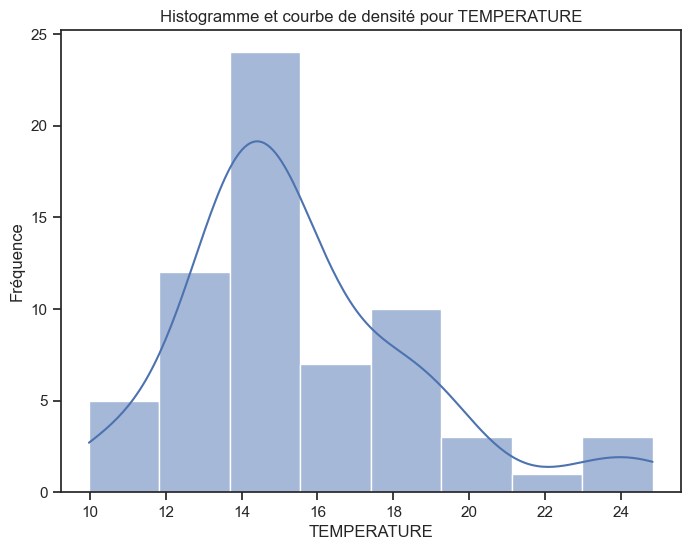

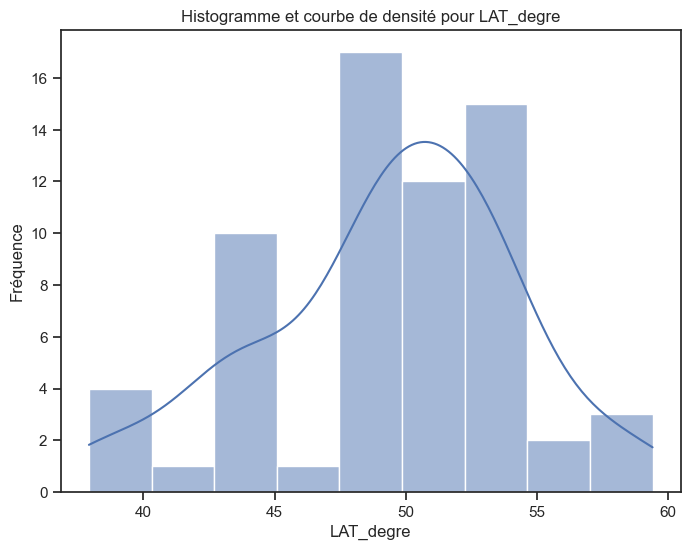

In [55]:
# Analyse graphique de la normalité des deux variables
for var in ["TEMPERATURE", "LAT_degre"]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_extract_per_year[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

In [56]:
print("")
print("No normality distribution, no Pearson test !!!") 
print("")


No normality distribution, no Pearson test !!!



## Spearman Correlation

Terms of use :

Both variables are quantitative or ordinal.

Data does not need to be normally distributed.

The relationship between variables can be monotonic (linear or nonlinear)

    H0 : No corrélation monotonic.

    H1 : Corrélation monotonic

In [57]:
# Corrélation de spearman

correlation,pvalue=spearmanr(df_extract_per_year[list_VAR[0]], df_extract_per_year[list_VAR[1]])
print("Spearman :")
if pvalue<0.05:
    print("Corrélation monotone entre",list_VAR)
else:
    print("No corrélation monotone",list_VAR)
if correlation>0:
    print("Correlation positive ",correlation)
else:
    print("Correlation negative ",correlation)


Spearman :
Corrélation monotone entre ['TEMPERATURE', 'LAT_degre']
Correlation negative  -0.8898164335664336


## Kendall Correlation  

In [58]:
# Calcul de la corrélation de kendall

correlation,pvalue=kendalltau(df_extract_per_year[list_VAR[0]], df_extract_per_year[list_VAR[1]])
print("Kendall")
if pvalue<0.05:
    print("Correlation monotone ",list_VAR)
else:
    print("No correlation monotone",list_VAR)
if correlation>0:
    print("Correlation positive ",correlation)
else:
    print("Correlation negative ",correlation)

Kendall
Correlation monotone  ['TEMPERATURE', 'LAT_degre']
Correlation negative  -0.7355769230769231



Conclusion : When Var(i) increases, Var(j) decreases.


## Graphical analysis

    Latitude increases, temperature decreases ?

In [59]:
df=df_extract_per_year#.groupby(['CITY','CN','CN_NAME','CAPITALE','LAT_degre',
#                               'LON_degre','HGHT_num'],as_index=False).agg({'TEMPERATURE':'mean','NB_HAB':'mean'})

df['classe_HAB']=pd.qcut(df['NB_HAB'],4, precision=2)
df['classe_LAT']=pd.qcut(df['LAT_degre'],4, precision=2)
df['classe_LON']=pd.qcut(df['LON_degre'],4, precision=2)

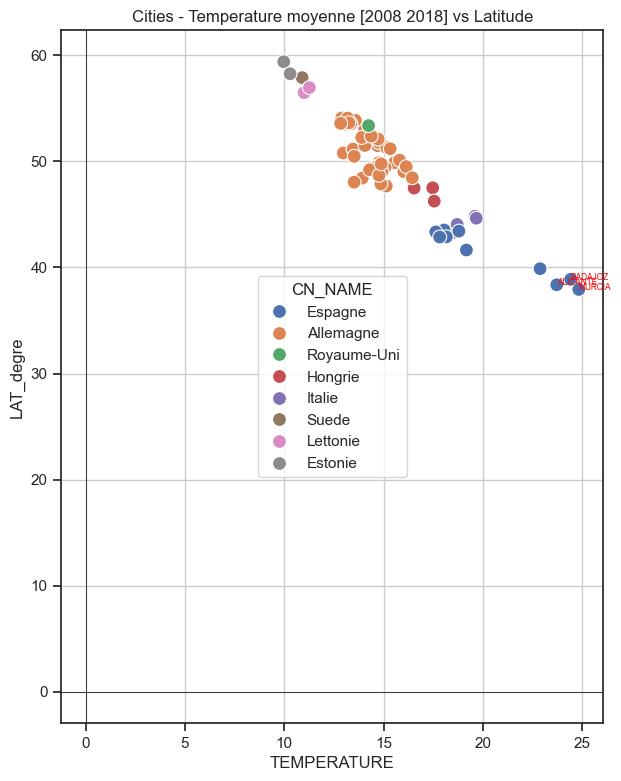

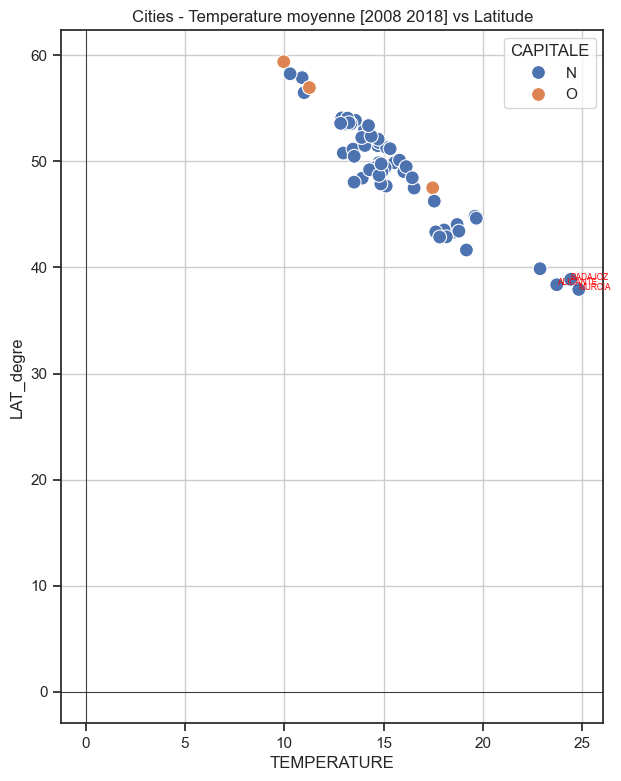

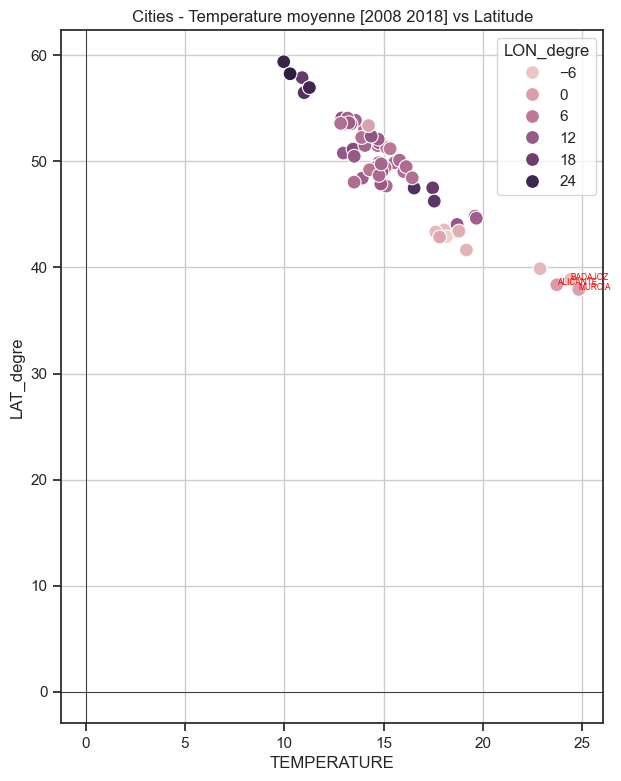

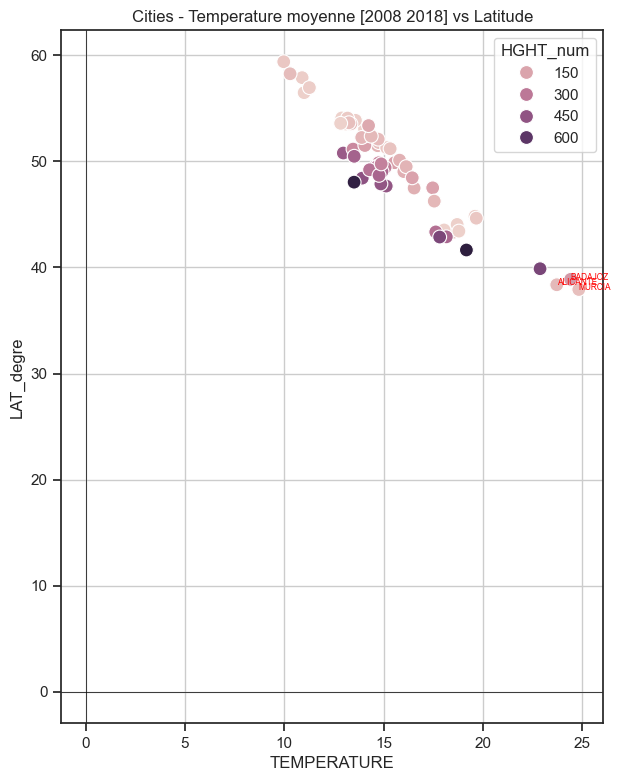

In [60]:

delta= 1.5*(df[list_VAR[0]].quantile(0.75) - df[list_VAR[0]].quantile(0.25))
df_outlier=df[(df[list_VAR[0]] > (df[list_VAR[0]].quantile(0.75) + delta)) | (df[list_VAR[0]] < (df[list_VAR[0]].quantile(0.25) - delta))]

for var in ['CN_NAME','CAPITALE','LON_degre','HGHT_num']:

    plt.figure(figsize=(7, 9))
    ax=sns.scatterplot(data=df, x=list_VAR[0], y=list_VAR[1],s=100, hue=var,legend=True)
        # Forcer l'origine à être visible
    ax.axhline(0, color='black', linewidth=0.5)  # Ligne horizontale pour l'axe des x
    ax.axvline(0, color='black', linewidth=0.5)  # Ligne verticale pour l'axe des y

    # Ajoutez les annotations
    for i, outlier in df_outlier.iterrows():
        ax.annotate(str(outlier["CITY"]), xy=(outlier[list_VAR[0]], outlier[list_VAR[1]]), color="red", fontsize=6)
        
    plt.xlabel(list_VAR[0])
    plt.grid()
    plt.title("Cities - Temperature moyenne [2008 2018] vs Latitude")
    plt.show()

# Quantitative vs Qualitative

## Student Test

Analyse graphique

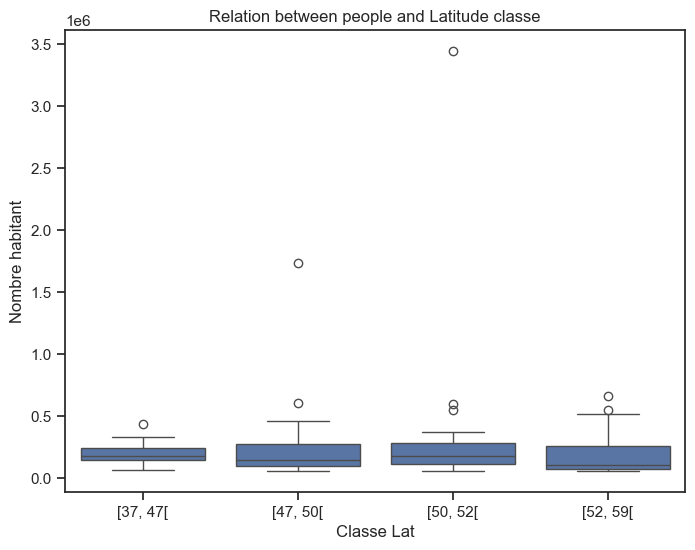

In [62]:
# Créer un boxplot de la relation entre :
df=df_extract_per_year
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='classe_LAT_degre', y='NB_HAB',order=order_LAT)
plt.xlabel('Classe Lat')
plt.ylabel('Nombre habitant')
plt.title('Relation between people and Latitude classe')
plt.show()

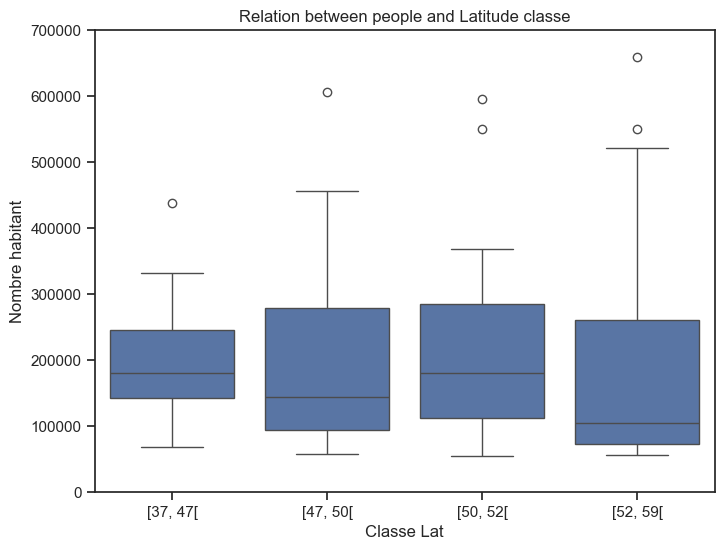

In [63]:
# Créer un boxplot de la relation entre :
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='classe_LAT_degre', y='NB_HAB',order=order_LAT)
plt.xlabel('Classe Lat')
plt.ylabel('Nombre habitant')
plt.title('Relation between people and Latitude classe')
plt.ylim(0, 700000)
plt.show()

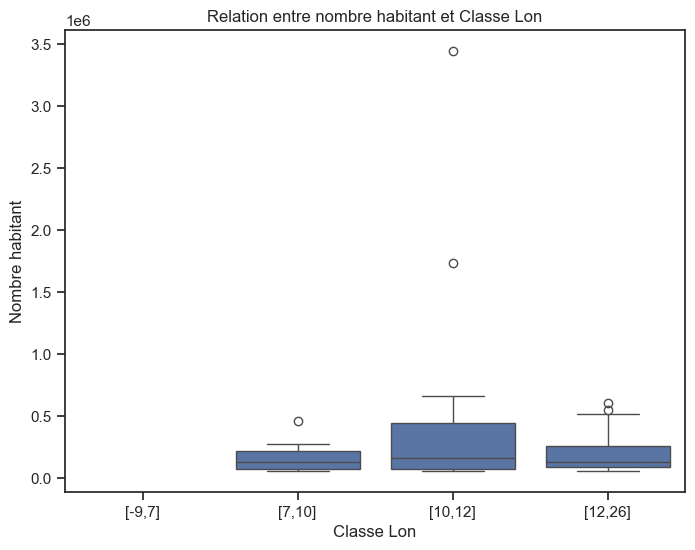

In [64]:
# Créer un boxplot de la relation entre :
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_extract_per_year, x='classe_LON_degre', y='NB_HAB',order=order_LON)
plt.xlabel('Classe Lon')
plt.ylabel('Nombre habitant')
plt.title('Relation entre nombre habitant et Classe Lon')
plt.show()

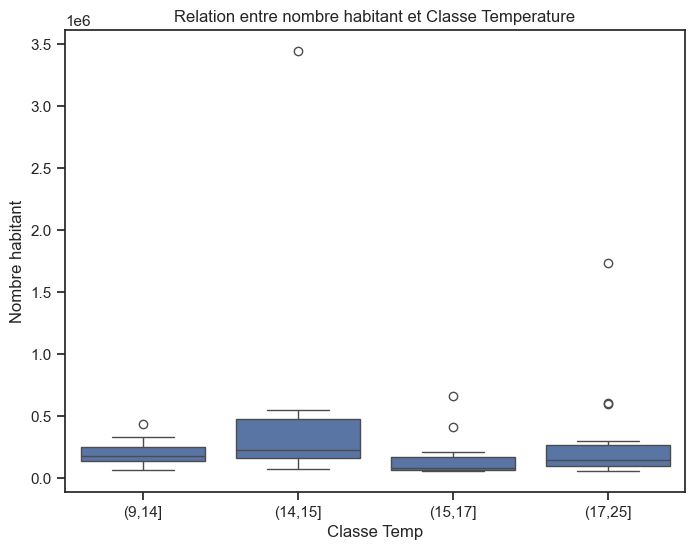

In [37]:
# Créer un boxplot de la relation entre 'species' et 'sepal_length' dans Iris
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_extract_per_year, x='classe_TEMPERATURE', y='NB_HAB',order=order_TEM)
plt.xlabel('Classe Temp')
plt.ylabel('Nombre habitant')
plt.title('Relation entre nombre habitant et Classe Temperature')
plt.show()

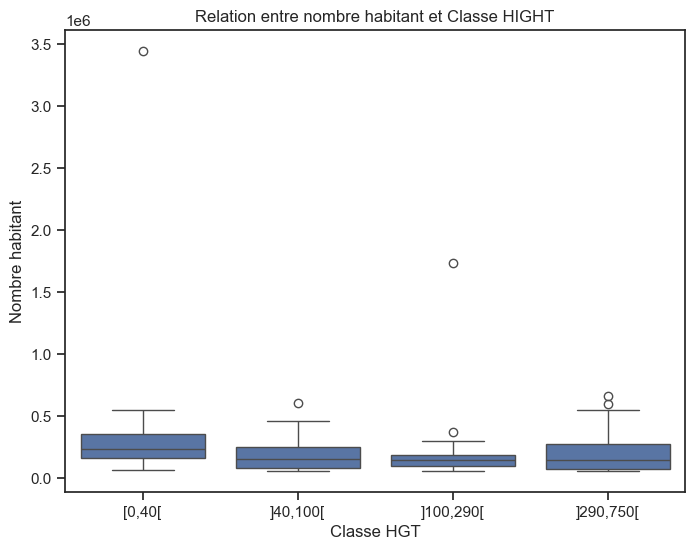

In [38]:
# Créer un boxplot de la relation entr
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_extract_per_year, x='classe_HGHT_num', y='NB_HAB',order=order_HGH)
plt.xlabel('Classe HGT')
plt.ylabel('Nombre habitant')
plt.title('Relation entre nombre habitant et Classe HIGHT')
plt.show()

T-Test Test de Student

Condition :

        Normalité des distributions

        Indépendance des echantillons
            

La densité de population est-elle en lien avec la latitude ?

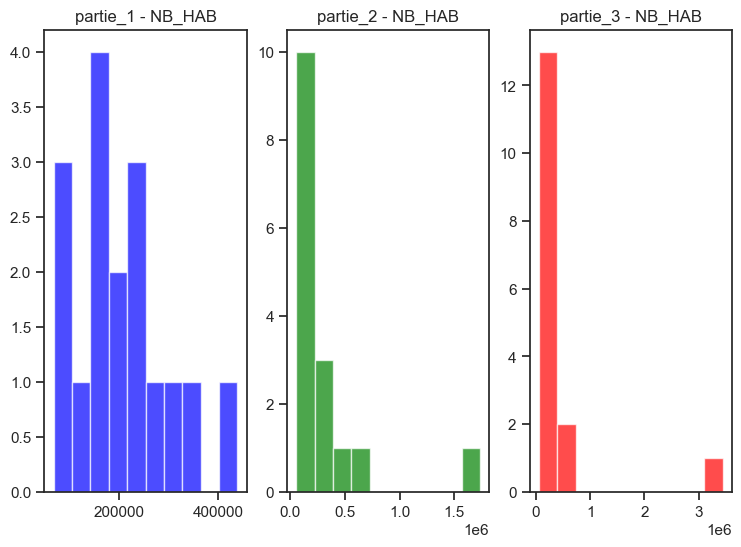

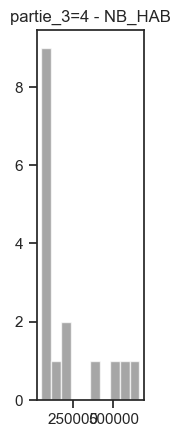

In [47]:
#sns.boxplot(data=df, x='classe_LAT_degre', y='NB_HAB',order=order_LAT)

# Analyse graphieque :

# Séparer les données en groupes en fonction de l'espèce
partie_1 = df[df['classe_LAT_degre'] == ']37, 47[']['NB_HAB']
partie_2 = df[df['classe_LAT_degre'] == ']47, 50[']['NB_HAB']
partie_3 = df[df['classe_LAT_degre'] == ']50, 52[']['NB_HAB']
partie_4 = df[df['classe_LAT_degre'] == ']52, 59[']['NB_HAB']

# Histogrammes pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.subplot(141)
plt.hist(partie_1, bins=10, color='blue', alpha=0.7)
plt.title("partie_1 - NB_HAB")
plt.subplot(142)
plt.hist(partie_2, bins=10, color='green', alpha=0.7)
plt.title("partie_2 - NB_HAB")
plt.subplot(143)
plt.hist(partie_3, bins=10, color='red', alpha=0.7)
plt.title("partie_3 - NB_HAB")
plt.show()
plt.subplot(144)
plt.hist(partie_4, bins=10, color='grey', alpha=0.7)
plt.title("partie_4 - NB_HAB")
plt.show()


In [48]:
# Vérifier la normalité à l'aide du test de Shapiro-Wilk
_, partie_1_p_value = shapiro(partie_1)
_, partie_2_p_value = shapiro(partie_2)
_, partie_3_p_value = shapiro(partie_3)
_, partie_4_p_value = shapiro(partie_4)

print("P-valeur de la normalité (Shapiro-Wilk) - partie_1:", partie_1_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - partie_2:", partie_2_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - partie_3:", partie_3_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - partie_4:", partie_4_p_value)

P-valeur de la normalité (Shapiro-Wilk) - partie_1: 0.545922040939331
P-valeur de la normalité (Shapiro-Wilk) - partie_2: 8.185253136616666e-06
P-valeur de la normalité (Shapiro-Wilk) - partie_3: 6.243685106710473e-07
P-valeur de la normalité (Shapiro-Wilk) - partie_4: 0.0007223945576697588


Pas de normalité sauf pour partie_1 !

     Test de Krsukal Wallis pour vérifier l'impact de la latitude sur la densité d'habitant